<a href="https://colab.research.google.com/github/manhili/ML-Assignments/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/FSR/blob/master/IDDLO-29-20/Notebooks/Logistic_Regression.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Logistic Regression

In [64]:
import sys
import urllib.request
import os

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import pipeline
#

## Part1: Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

### Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part, the code will load the data and display it on a 2-dimensional plot where the axes are the two exam scores, and the positive and negative examples are shown with different marker colors.

In [65]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/FSR/master/IDDLO-29-20/Notebooks/datasets/"
os.makedirs(data_path, exist_ok=True)
for filename in ("log_reg_data1.csv", "log_reg_data2.csv"):
    print("Downloading", filename)
    url = download_path + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [66]:
#load data
data_exam = pd.read_csv(data_path + '/log_reg_data1.csv')
data_exam.head()

,studentId,score1,score2,admitted
0,1,34.623660,78.024693,0
1,2,30.286711,43.894998,0
2,3,35.847409,72.902198,0
3,4,60.182599,86.308552,1
4,5,79.032736,75.344376,1


### Get the parameters of the model

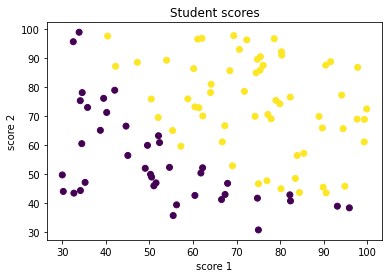

In [67]:
X = np.c_[data_exam[["score1","score2"]]]
y = np.c_[data_exam["admitted"]]

(m,n) = X.shape

# display all examples
fig = plt.figure()
plt.title('Student scores')
plt.xlabel('score 1')
plt.ylabel('score 2')
plt.scatter(X[:,0],X[:,1], c=y.ravel())
plt.show()

#add a column of 1s to X
#X = np.insert(X, 0, values=1, axis=1)

$w_j$ = clf.coef_, $w_0$ = clf.intercept_

In [68]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y.ravel())
#print model parameters
print("w0 =", clf.intercept_[0], ", w1 = ", clf.coef_[0][0], ", w2 = ", clf.coef_[0][1])

w0 = -12.553234703609858 , w1 =  0.10289545363171683 , w2 =  0.10051268616819356


### Plot the decision boundary
The decision boundary correspends to the value $y = 0.5$. We can write $x_2$ in terms of $x_1$ by solving the following equation:
$$ 0.5 = w_0 + w_1*x_1 + w_2*x_2 $$

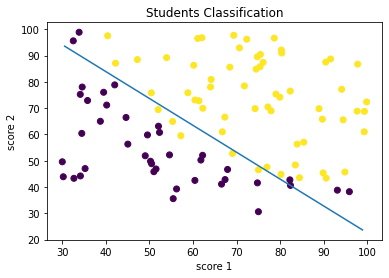

In [69]:
fig = plt.figure()
ax = plt.axes()
plt.title('Students Classification')
plt.xlabel('score 1')
plt.ylabel('score 2')
plt.scatter(X[:,0], X[:,1], c=y.ravel())

#generate new points to plot a decision boundary line
x1_vals = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
# the boundry is at line at y = 0.5 if y in {0,1} or y = 0 if y in {-1,1},   
# sklearn converts y to the range {-1,1}
# So, we can then write x2 in terms of x1 using: (w0 + w1*x1 + w2*x2 = 0)
x2_vals = -(clf.intercept_[0] + clf.coef_[0][0]*x1_vals) / clf.coef_[0][1]

# plot the line
plt.plot(x1_vals, x2_vals)
plt.show()

### Accuracy of the model
the score function measures how well the learned model predicts on a given set. 

In [70]:
#prediction probability of one example (the 5th example)
clf.predict_proba(X[5:6,:]) # the two probabilities sums up to 1.

#predicted class of an example (class with max probability)
clf.predict(X[5:6,:])

#prediction accuracy on the training set X
clf.score(X, y)

0.89

## Part 2: Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression using the ridge method to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### Load and Visualize the data
Similarly to the previous part, we will load and plot the data of the two QA test scores. The positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

In [71]:
data_microchip = pd.read_csv('datasets/log_reg_data2.csv')
data_microchip.head()

,microchipId,test1,test2,accepted
0,1,0.051267,0.69956,1
1,2,-0.092742,0.68494,1
2,3,-0.213710,0.69225,1
3,4,-0.375000,0.50219,1
4,5,-0.513250,0.46564,1


In [72]:
X = np.c_[data_microchip[["test1","test2"]]]
y = np.c_[data_microchip["accepted"]]

(m,n) = X.shape

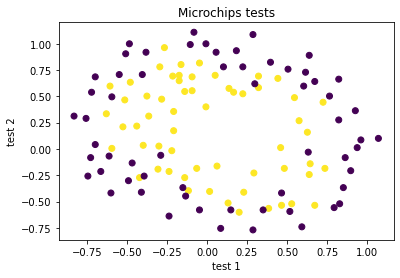

In [73]:
X1 = X[:,0]
X2 = X[:,1]

# display
fig = plt.figure()
plt.title('Microchips tests')
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.scatter(X1,X2, c=y.ravel())
plt.show()

### Feature mapping
The scatter plot shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

One way to fit the data better is to create more features from each data point. Sklearn provide you with such transformation. PolynomialFeatures allow you to map the features into all polynomial terms of $x_1$ and $x_2$ up to the order power $order$:
$$(1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_1^2x_2, x_2^2x_1, x_2^3, ..., x_2^{order})$$

In [74]:
from sklearn.preprocessing import PolynomialFeatures

order = 30

poly = PolynomialFeatures(order)
Xmap = poly.fit_transform(X)

print(X.shape)
print(Xmap.shape)

(118, 2)
(118, 496)


As a result of a six order power mapping (order=6), our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

### fit a logistic regression model to the polynomial features

In [75]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=10**7).fit(Xmap, y.ravel())
w_star = clf.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Plot the decision boundary

No handles with labels found to put in legend.


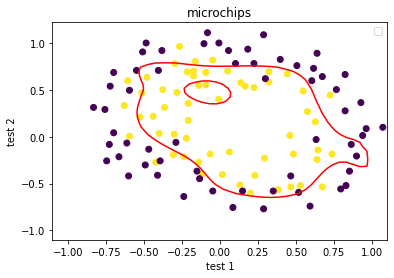

In [76]:
def get_boundary(u, v, theta, order):
    boundary = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            
            poly = PolynomialFeatures(order)
            uv = [np.array([u[i],v[j]])]
            poly_map = poly.fit_transform([np.array([u[i],v[j]])])
            boundary[i, j] = (poly_map[0].dot(np.array(theta)))

    return boundary

#plot data and boundary
fig = plt.figure()

u = np.linspace(-1.1, 1.1, 50)
v = np.linspace(-1.1, 1.1, 50)

boundary = get_boundary(u, v, w_star, order)

plt.title('microchips')
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.scatter(X1,X2, c=y.ravel())
plt.contour(u, v, boundary, 0, colors='red')
plt.legend()
plt.show()

### Evaluating the regularized logistic regression

In [77]:
clf.score(Xmap, y)

0.8813559322033898

## Tuning the hyper-parameters
Try tuning the two hyper-parameters ($C$ and the polynome order) and see how the decision boundary and the model's accuracy evolve.

### Use a grid search

In [78]:
acc = np.zeros((10, 20))

C_range = list(10**x for x in range (0, 10))

for idx, c in enumerate(C_range):
    print(idx, sep='.', end='', flush=True) 
    for order in range(1,21):
        poly = PolynomialFeatures(order)
        Xmap = poly.fit_transform(X)
        
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=c).fit(Xmap, y)
        
        acc[idx,order-1] = clf.score(Xmap, y)

0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

3

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

4

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

6

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

7

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

8

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

9

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

### get  $\lambda^*$ and $order^*$ (those maximizing the accuracy)

(4, 10)
0.8983050847457628
c_star =  10000 , order_star =  10


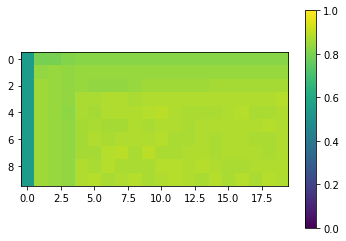

In [79]:
from numpy import unravel_index
acc_max_idx = unravel_index(acc.argmax(), acc.shape)
print(acc_max_idx)
print(acc[acc_max_idx[0], acc_max_idx[1]])


c_star = C_range[acc_max_idx[0]]
order_star = acc_max_idx[1]

print("c_star = ", c_star, ", order_star = ", order_star)


fig = plt.figure()
fig.clf()
ax = fig.add_subplot(1,1,1)
img = ax.imshow(acc, interpolation='nearest', vmin=0.0, vmax=1.0)
fig.colorbar(img)

plt.show()

### plot data and boundary

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
No handles with labels found to put in legend.


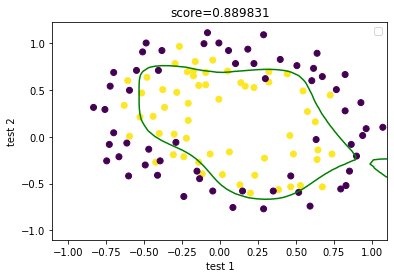

In [80]:
fig = plt.figure()

u = np.linspace(-1.1, 1.1, 50)
v = np.linspace(-1.1, 1.1, 50)

poly = PolynomialFeatures(order_star)
Xmap = poly.fit_transform(X)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=c_star).fit(Xmap, y)
theta_star =  clf.coef_[0]     


boundary_green = get_boundary(u, v, theta_star, order_star)

plt.title('score=%f' %clf.score(Xmap, y))
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.scatter(X1,X2, c=y.ravel())
plt.contour(u, v, boundary_green, 0, colors='green')
plt.legend()
plt.show()

## Exercise

In [81]:
#1) use pipelines
#1) try GridSearch and Randomised Search
#2) try SVM with different Kernels
#3) try GridSearch and Randomised Search

**Use pipelines**

**GridSearch**

In [82]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['multi_class'] = ['auto', 'ovr', 'multinomial']
# define search
search = GridSearchCV(clf, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y.ravel())
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.4527777777777777
Best Hyperparameters: {'multi_class': 'auto', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 483, in _check_multi_class
    raise ValueErr

So according to GridSearchCV the best Hyperparameters are : **{'multi_class': 'auto', 'solver': 'newton-cg'}**

**RandomizedSearch**

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['multi_class'] = ['auto', 'ovr', 'multinomial']
# define search
search = RandomizedSearchCV(clf, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y.ravel())
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best Score: 0.4527777777777777
Best Hyperparameters: {'solver': 'newton-cg', 'multi_class': 'auto'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 483, in _check_multi_class
    raise ValueErr

RandomizedSearch also gives the same results as before.

**Try SVM with different Kernels**

In [84]:
from sklearn import svm

clf_linear = svm.SVC(kernel='linear', C = 10, gamma = 0.0001) # Linear Kernel
clf_poly = svm.SVC(kernel='poly', C = 10,  gamma = 0.0001, degree = 20)     # Polynomial Kernel
clf_rbf = svm.SVC(kernel='rbf', C =10, gamma = 0.0001)       # RBF Kernel

#Train the model using the training sets
clf_linear.fit(X , y.ravel())
clf_poly.fit(X, y.ravel())
clf_rbf.fit(X, y.ravel())

#Prediction on the 
clf_linear.predict(X[5:6,:])
clf_poly.predict(X[5:6,:])
clf_rbf.predict(X[5:6,:])

#prediction accuracy on the training set X
print("Linear kernel score:", clf_linear.score(X, y))
print("Polynomial kernel score:", clf_poly.score(X, y))
print("RBF kernel score:", clf_rbf.score(X, y))



Linear kernel score: 0.5508474576271186
Polynomial kernel score: 0.5084745762711864
RBF kernel score: 0.5084745762711864
